---
# Zadaća 6
##### Rok za predaju: 21. travnja, 2021. u 23:59h
##### Način predaje: Teams->Strojno učenje->Assignment, predajete.ipynb datoteka (ili više datoteki u .zip) ili link na Google colab 

### Ime i prezime: Luka Strapač
---

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Zadatak 1
Učitajte podatke koji su vam dani u datoteci 'z1-data.csv'. <br>
Implementirajte k-means algoritam tako da mu ulazni parametri bude broj klastera i da algoritam pokrećete 10 puta sa slučajno odabranim podacima iz zadanog skupa podataka kao početnim centrima te vratite onu particiju koja ima najmanju vrijednost kriterijske funkcije (od tih 10 dobivenih particija). <br>

Kada ste implementirali algoritam, pokrenit ćete ga sa nizom različitih vrijednosti za $K$ - broj klastera. 
- Pokrenite algoritam za $K = 2, 3, 4, 5, 6, 7, 8, 9, 10$
- Za svaki $K$ napravite sljedeće
    - Ispišite broj koraka potreban da algoritam konvergira
    - Ispišite vrijednostu kriterijske funkcije za dobivenu particiju
    - Grafički prikažite podatke s naznačenim centrima. 
- Za jedno od pokretanja nacrtajte graf promjene vrijednosti kriterijske funkcije kroz korake izvršavanja algoritma
- Kada ste pokrenuli algoritam za sve vrijednosti $K$, nacrtajte graf promjene vrijednosti kriterijske funkcije u dobivenoj particiji za $K = 2,3,4,5,6,7,8,9,10$.
    - Za koji izbor $K$ će vrijednost kriterijske funkcije biti najmanja i zašto?
    - Koji broj klastera biste odabrali kao primjeren i zašto?

In [4]:
# Vaš kod

def dls(x):
    return np.linalg.norm(x,2)**2   

def Fls(x,u,c):
    s = 0
    for i in range(len(c)):
        s += dls(u[c[i]]-x[i])
    return s
    
def g(x, centers):
    resg = 0
    resf = 0
    tmp = np.mean(x, axis=0)
    distances = np.zeros((len(x),len(centers)))  
    
    for i in range(len(centers)):
        distances[:,i] = np.linalg.norm(x - centers[i], axis=1)
    clusters = np.argmin(distances, axis = 1)
    for i in range(len(centers)):
        dots = x[clusters==i]
        for j in dots:
            resf += dls(centers[i]-j)
        resg += len(dots)*dls(centers[i]-tmp)
    return resg,resf

def CHindex(x, k, centers):
    m = x.shape[0]
    G, F = g(x,centers)
    tmp1 = 1/(k-1)
    tmp2 = 1/(m-k)
    return (tmp1*G)/(tmp2*F) 

#%%

def k_means(x,K,graf = False):
    m = x.shape[0]
    F = np.inf
    for j in range(10):
        fs = []
        t = 0        
        u = x[np.random.choice(m, size=K, replace=False)]
        centers_old = np.zeros(u.shape)
        centers_new = np.array(u)
        
        clusters = np.zeros(m)
        distances = np.zeros((m,K))   
        
        error = np.linalg.norm(centers_new - centers_old)
        
        while error != 0:
            for i in range(K):
                distances[:,i] = np.linalg.norm(x - centers_new[i], axis=1)
            clusters = np.argmin(distances, axis = 1)
            
            centers_old = np.array(centers_new)
            for i in range(K):
                if (len(x[clusters == i])!=0):
                    centers_new[i] = np.mean(x[clusters == i], axis=0)
            error = np.linalg.norm(centers_new - centers_old)
            t+=1
            o,p= g(x, centers_old)
            fs+=[p]
        o,p= g(x, centers_old)
        fs+=[p]
        if F > fs[-1]:
            F = fs[-1]
            centers = centers_new
            T = t
            Fs = fs
     
    if graf:
        plt.figure("Graf promjene vrijednosti kriterijske funkcije kroz korake izvršavanja algoritma za K = {}".format(K))
        plt.title("Graf promjene vrijednosti kriterijske funkcije kroz korake izvršavanja algoritma za K = {}".format(K))
        plt.scatter(np.arange(1,len(Fs)+1),Fs)
        
    else:
        print("Broj particije: ", K)

        print("Broj iteracija: ", T)

        print("Vrijednost kriterijske f-je:", F)
        plt.figure("K = {}".format(K))
        plt.title("K = {}".format(K))
        plt.scatter(x[:,0],x[:,1])
        plt.scatter(centers[:,0],centers[:,1],marker="x")

        plt.show()
    return T,F

Broj particije:  2
Broj iteracija:  5
Vrijednost kriterijske f-je: 1.4262870754719534


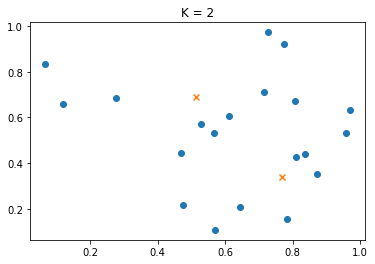

Broj particije:  3
Broj iteracija:  5
Vrijednost kriterijske f-je: 0.7713765144092083


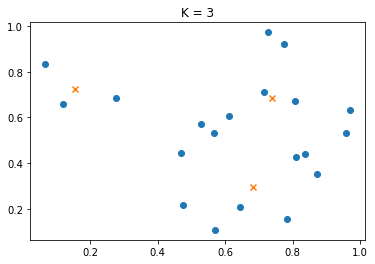

Broj particije:  4
Broj iteracija:  5
Vrijednost kriterijske f-je: 0.49163768981829264


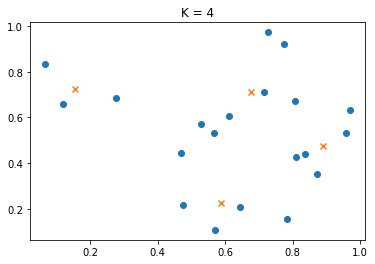

Broj particije:  5
Broj iteracija:  5
Vrijednost kriterijske f-je: 0.2652757949320664


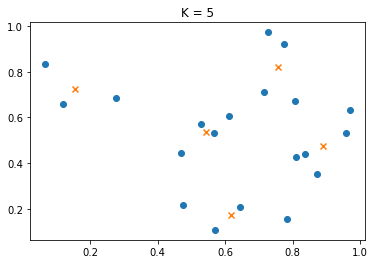

Broj particije:  6
Broj iteracija:  4
Vrijednost kriterijske f-je: 0.19324728969822672


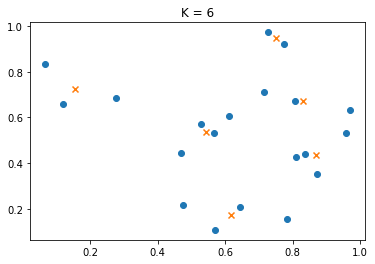

Broj particije:  7
Broj iteracija:  5
Vrijednost kriterijske f-je: 0.1566061116173205


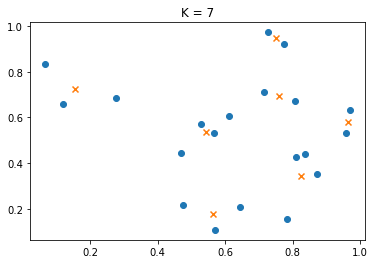

Broj particije:  8
Broj iteracija:  4
Vrijednost kriterijske f-je: 0.1275545350499807


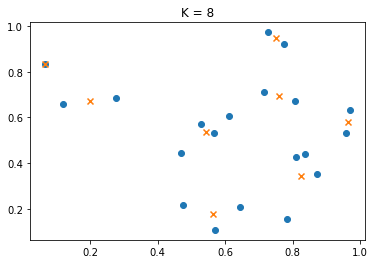

Broj particije:  9
Broj iteracija:  5
Vrijednost kriterijske f-je: 0.08512524163844427


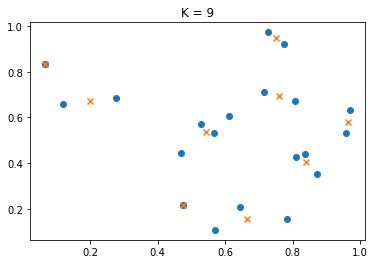

Broj particije:  10
Broj iteracija:  2
Vrijednost kriterijske f-je: 0.08754081601556395


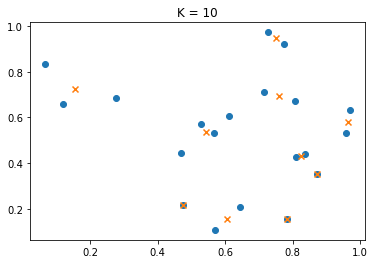

(2, 0.20970097888612005)

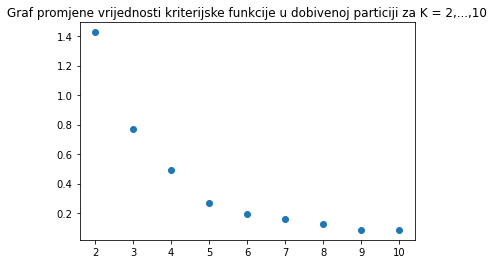

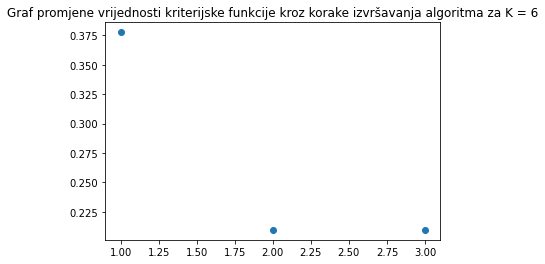

In [5]:
X = np.load("z1-data.npy")
Fs=[]

for i in range(2,11):
    t,F = k_means(X,i)
    
    Fs+=[F]


    
plt.figure("Graf promjene vrijednosti kriterijske funkcije u dobivenoj particiji za K = 2,...,10")
plt.title("Graf promjene vrijednosti kriterijske funkcije u dobivenoj particiji za K = 2,...,10")
plt.scatter(np.arange(2,11),Fs)

k_means(X,6, graf = True)

#Vrijednost kriterijske funkcije će biti najmanja za K = 10. Razlog je zato što tada ima najveći broj klastera.
#Odabrao bih 9 klastera kao primjeren broj, zbog najblažeg pada kriterijske f-je

---
## Zadatak 2
Učitajte podatke koji su vam dani u datoteci 'z2-data.csv'. <br>
Primjenom k-means algortima implementiranog u prethodnim zadacima pokrenite algoritam za $K = 2,3,4,5,6,7,8,9,10$. <br>
- Za svaki $K$, kada ste pokrenuli algoritam i dobili particiju, izračunajte vrijednost funkcije $\mathcal{F}_{LS}$
- Za svaki $K$, kada ste pokrenuli algoritam i dobili particiju, izračunajte Calinski–Harabasz indeks

Koju particiju biste odabrali kao primjerenu na temelju izračunatih indeksa? Obrazložite. 

In [6]:
# Vaš kod

def k_means(x,K):
    m = x.shape[0]
    F = np.inf
    for j in range(10):
        fs = []
        t = 0        
        u = x[np.random.choice(m, size=K, replace=False)]
        centers_old = np.zeros(u.shape)
        centers_new = np.array(u)
        
        clusters = np.zeros(m)
        distances = np.zeros((m,K))   
        
        error = np.linalg.norm(centers_new - centers_old)
        
        while error != 0:
            for i in range(K):
                distances[:,i] = np.linalg.norm(x - centers_new[i], axis=1)
            clusters = np.argmin(distances, axis = 1)
            
            centers_old = np.array(centers_new)
            for i in range(K):
                if (len(x[clusters == i])!=0):
                    centers_new[i] = np.mean(x[clusters == i], axis=0)
            error = np.linalg.norm(centers_new - centers_old)
            t+=1
            o,p= g(x, centers_old)
            fs+=[p]
        o,p= g(x, centers_old)
        fs+=[p]
        if F > fs[-1]:
            F = fs[-1]
            centers = centers_new
            T = t
            Fs = fs
    
    
    print("K: ",K)
    print("Fls: ", g(x,centers)[0])
    print("CH: ", CHindex(x,K,centers))
    return 0
        

In [7]:
X = np.load("z2-data.npy")

for i in range(2,11):
    k_means(X,i)
    
#Odabrao bih 10. particiju, jer je za nju CH-indeks najveći.

K:  2
Fls:  7.118231473470821
CH:  70.96576805134548
K:  3
Fls:  10.958991173991809
CH:  88.74574545230801
K:  4
Fls:  12.761663966411943
CH:  97.54592862456212
K:  5
Fls:  13.69882711785258
CH:  100.12812341451242
K:  6
Fls:  14.350140357835286
CH:  103.84262897416265
K:  7
Fls:  14.825545866257947
CH:  108.26207970901922
K:  8
Fls:  15.151118201513617
CH:  110.81083615876712
K:  9
Fls:  15.431299334783066
CH:  115.72181732247131
K:  10
Fls:  15.551354062195676
CH:  111.33706663612182


---
## Zadatak 3
U ovom zadatku je cilj pomoću k-means algoritma kompresirati sliku. <br>
Koristeći 24-bitnu reprezentaciju slike, svaki piksel je reprezentiran pomoću tri 8-bitna cijela broja (u rasponu 0-255), gdje ti cijeli brojevi predstavljaju intenzitet crvene (Red), zelene (Green) i plave (Blue). Što znači da svaki piksel može poprimiti jedan od $2^8$ intenziteta crvene, $2^8$ zelene i $2^8$ plave. Sve zajedno daje $2^{24}$ različitih boja. <br>
Vaš zadatak će biti jednu takvu sliku kompresirati na samo 16 boja. <br>
Pomoću k-means algoritma je potrebno odabrati 16 boja koje će reprezentirati sve boje na slici. <br>
Svaki piksel na slici nam predstavlja jedan podatak i piksele želimo grupirati u 16 grupa. Kada to napravimo - imamo 16 grupa tj. 16 boja, potrebno je na originalnoj slici sve piksele obojati u onu boju (grupu) kojoj pripadaju. 

Učitajte proizvoljnu sliku. Možete koristiti `PIL` biblioteku.  

In [25]:
# Vaš kod

def k_meansIM(x,K):
    m = x.shape[0]
    F = np.inf
    for j in range(10):
        fs = []
        t = 0        
        u = x[np.random.choice(m, size=K, replace=False)]
        centers_old = np.zeros(u.shape)
        centers_new = np.array(u)
        
        clusters = np.zeros(m)
        distances = np.zeros((m,K))   
        
        error = np.linalg.norm(centers_new - centers_old)
        
        while error != 0:
            for i in range(K):
                distances[:,i] = np.linalg.norm(x - centers_new[i], axis=1)
            clusters = np.argmin(distances, axis = 1)
            
            centers_old = np.array(centers_new)
            for i in range(K):
                if (len(x[clusters == i])!=0):
                    centers_new[i] = np.mean(x[clusters == i], axis=0)
            error = np.linalg.norm(centers_new - centers_old)
            t+=1
            o,p= g(x, centers_old)
            fs+=[p]
        o,p= g(x, centers_old)
        fs+=[p]
        if F > fs[-1]:
            F = fs[-1]
            centers = centers_new
            win_clus = clusters
            T = t
            Fs = fs
    return win_clus,centers

In [29]:
from PIL import Image

datapath = 'mis.jfif'
im = Image.open(datapath)

picture = np.array(im)
print(picture.shape)
p = np.reshape(picture, (picture.shape[0] * picture.shape[1], picture.shape[2]))/255

wc, c = k_meansIM(p,16)

pic = np.round(np.array([c[i] for i in wc]).reshape(picture.shape)*255)

picf = Image.fromarray(np.array(pic,dtype=type(picture[0,0,0])))

picf.show()



(183, 275, 3)


---
## Zadatak 4 
Ucitajte podatke 'z1-data1.npy' i 'z1-data2.npy'. Pomoću kmeans algoritma (na vježbama smo pokazali kako koristiti kmeans algoritam iz paketa sklearn) grupirajte podatake u 5 klastera. Koristeći funkciju danu u predlošku, vizualizirajte podatke. 
<br>
Što možete reći o kmeans algoritmu na temelju dobivenog grafičkog prikaza?

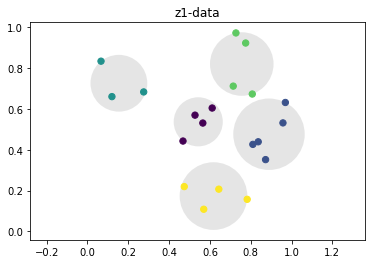

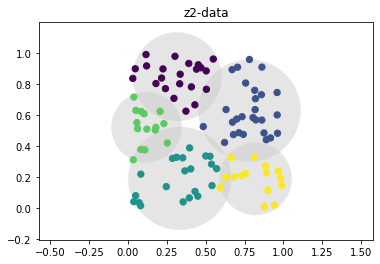

In [3]:

# Funkcija za crtanje
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

def plot_kmeans(X,labels, centers, n_clusters=4, rseed=0, ax=None):
    # Proslijedite argumente
    # X- podaci
    # labels - oznake pripadnosi klasteru za svaki podatak
    # centers - centri klastera
    # n_cluster - broj klastera
    
    
    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

z1 = np.load("z1-data.npy")
z2 = np.load("z2-data.npy")
z1fit = KMeans(n_clusters=5).fit(z1)
plt.figure(0)
plt.title('z1-data')
plot_kmeans(z1, z1fit.labels_, z1fit.cluster_centers_)
z2fit = KMeans(n_clusters=5).fit(z2)
plt.figure(1)
plt.title('z2-data')
plot_kmeans(z2, z2fit.labels_, z2fit.cluster_centers_)

#iz grafičkih prikaza se vidi da iako neki podaci mogu pripadati u više klastera, kmeans se odluči samo za jedan klaster
#i to po princicu, klaster čijem je krajnjem centru podatak najbliži

---

## Zadatak 5
Implementirajte EM algoritam tako da mu proslijeđujete neke početne vrijednosti za parametre $\mu, \sigma, p$. 

- Pokrenite algoritam na podacima zadanim u 'z2-data.npy' s k = 2 i početnim vrijednostima parametara $\mu = [30,30]$, $\sigma = [100,100]$, $p = [0.5,0.5]$
    - Ispišite dobivene vrijednosti parametara, broj koraka koje je algoritam izvršio
    - Prikažite graf promjene vrijednosti funkcije log-izglednosti kroz iteracije
- Pokrenite algoritam s različitim vrijednostima k = 2, 3, 4, 5 tako da za svaki k proslijedite slučajno odabrate početne vrijednosti parametara i algoritam pokrenete 10 putazatim odaberete najbolji rezultat za od tih 10 za dani k. 
    - Za svaki k ispišite broj iteracija koje je algoritam izvršio. 
    - za svaki k prikažite graf promjene vrijednosti funkcije log-izglednosti kroz iteracije


In [4]:
# Vaš kod
import random
from scipy.stats import multivariate_normal as mvn

def EM(X,k,max_it = 10, beg_vars = False):
    m = X.shape[0]
    
    for it in range(max_it):
        ws = np.zeros((m,k))
        t = 0
        if beg_vars==False:
            mi = X[np.random.choice(m, size=k, replace=False)].reshape(-1,X.shape[1])
            
            sigma = X.std(axis=0)*np.array([random.uniform(0.5,2) for i in range(k)]).reshape(-1,X.shape[1],X.shape[1])
            
            p = []
            best_li = -np.inf
            for i in range(k):
                p.append(random.random()*(1-sum(p)))
            
            
        else:
            #mi = [[1,2]]
            #sigma =[[[1]], [[2]]]
            #p = [1]
            best_li = -np.inf
            mi = np.array([[30.0],[30.0]])
            sigma = np.array([[[100.0]], [[100.0]]])
            p = []
            p.append(0.5)
            p.append(0.5)
            
            
            
        p[-1] = 1-sum(p[1:-1])
        p = np.array(p).reshape(-1,1)
        error = 1
        old_li = 0
        lis=[]
        
        while error > 1e-4:
            t+=1
            ws = np.zeros((k, m))
            for j in range(k):
                ws[j, :] = p[j] * mvn(mi[j], sigma[j]).pdf(X)
            li = np.log(ws).sum()
            ws /= ws.sum(0)
            
            p = (1/m)*ws.sum(axis=1).reshape(-1,1)
            
            mi = ws.dot(X)/ws.sum(axis=1).reshape(-1,X.shape[1])
            
            for i in range(k):
                a = (X-mi[i])
                sigma[i] = (np.reshape(ws[i],(1,-1)).dot(a*a))/(ws[i].sum())
            
            error = abs(old_li-li)
            old_li = li
            lis.append(li)
           
            if t > 1000:
                break
        if li > best_li:
            best_lis = lis
            best_t = t
            best_mi = mi
            best_p = p
            best_sigma = sigma
    if max_it == 1:
        plt.figure("Graf promjene vrijednosti f-je log izglednosti kroz iteracije")
        plt.title("Graf promjene vrijednosti f-je log izglednosti kroz iteracije")
        plt.plot(np.arange(1,best_t+1),best_lis)
    else:
        plt.figure("Graf promjene vrijednosti f-je log izglednosti kroz iteracije za k = {}".format(k))
        plt.title("Graf promjene vrijednosti f-je log izglednosti kroz iteracije za k = {}".format(k))
        plt.plot(np.arange(1,best_t+1),best_lis)
    return best_mi,best_sigma,best_p,best_t
    


mi: [[33.96797106]
 [33.96797106]]
sigma: [[[109.34270074]]

 [[109.34270074]]]
p: [[0.33333333]
 [0.66666667]]
Broj koraka: 3
k: 2
mi: [[19.83550526]
 [39.96348391]]
sigma: [[[23.55488907]]

 [[25.05949757]]]
p: [[0.2978696]
 [0.7021304]]
Broj koraka: 65
k: 3
mi: [[40.0951679 ]
 [37.37156546]
 [19.72045596]]
sigma: [[[23.75630248]]

 [[47.73859733]]

 [[22.97618829]]]
p: [[0.64595694]
 [0.06154449]
 [0.29249857]]
Broj koraka: 1001
k: 4
mi: [[19.7472955 ]
 [39.29414343]
 [38.9646421 ]
 [42.18222572]]
sigma: [[[23.06367665]]

 [[32.76827742]]

 [[18.89841624]]

 [[18.37188769]]]
p: [[0.29427415]
 [0.26957227]
 [0.25910365]
 [0.17704993]]
Broj koraka: 1001


<ipython-input-4-18bdc03937c1>:46: RuntimeWarning: divide by zero encountered in log
  li = np.log(ws).sum()
<ipython-input-4-18bdc03937c1>:57: RuntimeWarning: invalid value encountered in double_scalars
  error = abs(old_li-li)


k: 5
mi: [[37.52256976]
 [42.80229942]
 [49.7252766 ]
 [19.69744808]
 [36.90497132]]
sigma: [[[ 6.45528713]]

 [[11.7368285 ]]

 [[10.57376325]]

 [[22.75909159]]

 [[23.58969429]]]
p: [[0.11459305]
 [0.29982264]
 [0.02012711]
 [0.29254419]
 [0.27291301]]
Broj koraka: 1001


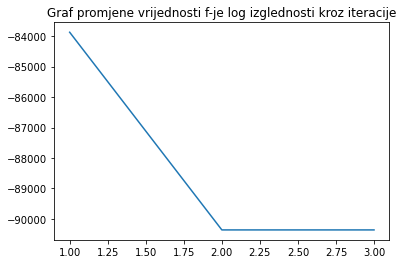

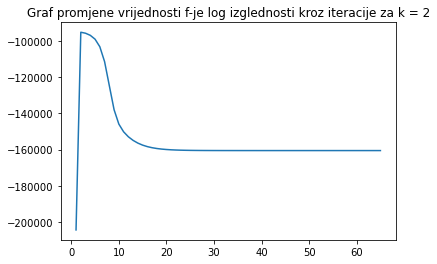

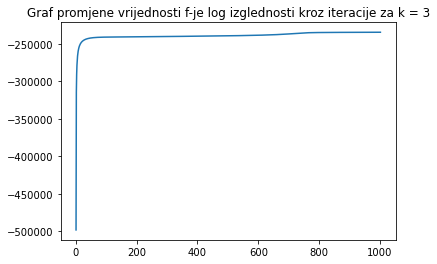

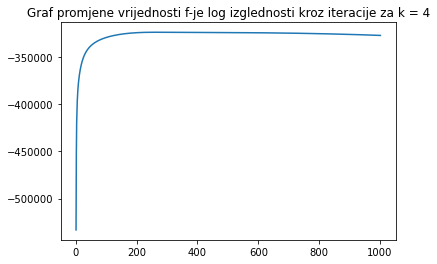

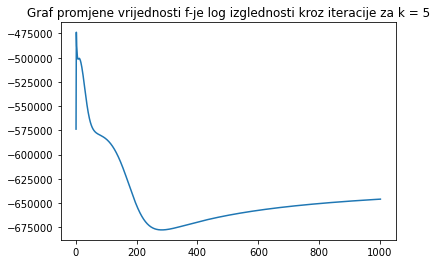

In [5]:
z2 = np.load("z2-data 1.npy").reshape(-1,1)

mi, sigma, p, t = EM(z2,2,1, True)

print("mi:", mi)
print("sigma:", sigma)
print("p:", p)
print("Broj koraka:", t)
#d,e,f,g = EM(z2,2,1,True)

for i in range(2,6):
    mi, sigma, p, t = EM(z2,i,10, False)
    print("k:", i)
    print("mi:", mi)
    print("sigma:", sigma)
    print("p:", p)
    print("Broj koraka:", t)

---
## Zadatak 6
---
Koristeći implementaciju EM algoritma iz prošlog zadatka trebate odrediti parametre za podatke koji su vam dani u datoteci 'z2-data' za k = 4. 
- Pokrenite algoritam koristeći slučajno odabrane parametre kao početne (algoritam pokrenite 10 puta i odaberite najbolji rezultat)
- Pokrenite k-means algoritam (može sklearn) na vašim podacima. Dobivena središte koritite kao početne vrijednosti za očekivanje. 

In [ ]:
# Vaš kod

mi, sigma, p, t = EM(z2,4,10, False)

print("mi:", mi)
print("sigma:", sigma)
print("p:", p)
print("Broj koraka:", t)

kmeans = KMeans().fit(z2)
print("Središta: ",kmeans.cluster_centers_)